(주의) 본 매뉴얼에서 Stata 기능은 라이선스 이슈로 아직까지는 BIDAS 환경에서 사용할 수 없다. 매뉴얼에서 stata 관련 코드는 주석처리하였다. 로컬환경(내부망, 인터넷망)에서 활용하는 경우 주석해제 하여 사용할 수 있다.

# 파이썬에서 Stata 실행하기
- 작성자: 고려대학교 경제학과 한치록 교수

`pystata` 모듈을 사용하면 파이썬에서 Stata를 실행할 수 있다.
```sh
pip install pystata stata_setup
```

In [1]:
# import stata_setup
# stata_setup.config("/Applications/Stata", "mp", splash = False) # Chage False to True to see the splash

In [2]:
# %%stata
# sysuse auto, clear
# describe


. sysuse auto, clear
(1978 automobile data)

. describe

Contains data from /Applications/Stata/ado/base/a/auto.dta
 Observations:            74                  1978 automobile data
    Variables:            12                  13 Apr 2022 17:45
                                              (_dta has notes)
-------------------------------------------------------------------------------
Variable      Storage   Display    Value
    name         type    format    label      Variable label
-------------------------------------------------------------------------------
make            str18   %-18s                 Make and model
price           int     %8.0gc                Price
mpg             int     %8.0g                 Mileage (mpg)
rep78           int     %8.0g                 Repair record 1978
headroom        float   %6.1f                 Headroom (in.)
trunk           int     %8.0g                 Trunk space (cu. ft.)
weight          int     %8.0gc                Weight (lbs.)


In [3]:
# %%stata
# reg mpg price i.foreign, vce(r)


Linear regression                               Number of obs     =         74
                                                F(2, 71)          =      15.88
                                                Prob > F          =     0.0000
                                                R-squared         =     0.3932
                                                Root MSE          =     4.5696

------------------------------------------------------------------------------
             |               Robust
         mpg | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
       price |   -.000959   .0002049    -4.68   0.000    -.0013675   -.0005505
             |
     foreign |
    Foreign  |   5.245271   1.296213     4.05   0.000     2.660695    7.829847
       _cons |   25.65058   1.330664    19.28   0.000     22.99731    28.30385
---------------------------------------------------------------

In [4]:
# %%stata -eret myeret
# reg mpg price i.foreign, vce(r)


Linear regression                               Number of obs     =         74
                                                F(2, 71)          =      15.88
                                                Prob > F          =     0.0000
                                                R-squared         =     0.3932
                                                Root MSE          =     4.5696

------------------------------------------------------------------------------
             |               Robust
         mpg | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
       price |   -.000959   .0002049    -4.68   0.000    -.0013675   -.0005505
             |
     foreign |
    Foreign  |   5.245271   1.296213     4.05   0.000     2.660695    7.829847
       _cons |   25.65058   1.330664    19.28   0.000     22.99731    28.30385
---------------------------------------------------------------

In [5]:
# myeret

{'e(N)': 74.0,
 'e(df_m)': 2.0,
 'e(df_r)': 71.0,
 'e(F)': 15.88484770364143,
 'e(r2)': 0.39324012569622946,
 'e(rmse)': 4.569638248831391,
 'e(mss)': 960.8663049714787,
 'e(rss)': 1482.5931544879809,
 'e(r2_a)': 0.3761482982510528,
 'e(ll)': -215.90831771275379,
 'e(ll_0)': -234.39433764823468,
 'e(rank)': 3.0,
 'e(cmdline)': 'regress mpg price i.foreign, vce(r)',
 'e(title)': 'Linear regression',
 'e(marginsprop)': 'minus',
 'e(marginsok)': 'XB default',
 'e(vce)': 'robust',
 'e(_r_z_abs__CL)': '|t|',
 'e(_r_z__CL)': 't',
 'e(depvar)': 'mpg',
 'e(cmd)': 'regress',
 'e(properties)': 'b V',
 'e(predict)': 'regres_p',
 'e(model)': 'ols',
 'e(estat_cmd)': 'regress_estat',
 'e(vcetype)': 'Robust',
 'e(b)': array([[-9.59034169e-04,  0.00000000e+00,  5.24527100e+00,
          2.56505843e+01]]),
 'e(V)': array([[ 4.19741713e-08,  0.00000000e+00, -5.53666404e-05,
         -2.45539900e-04],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00],
        [-5.53666

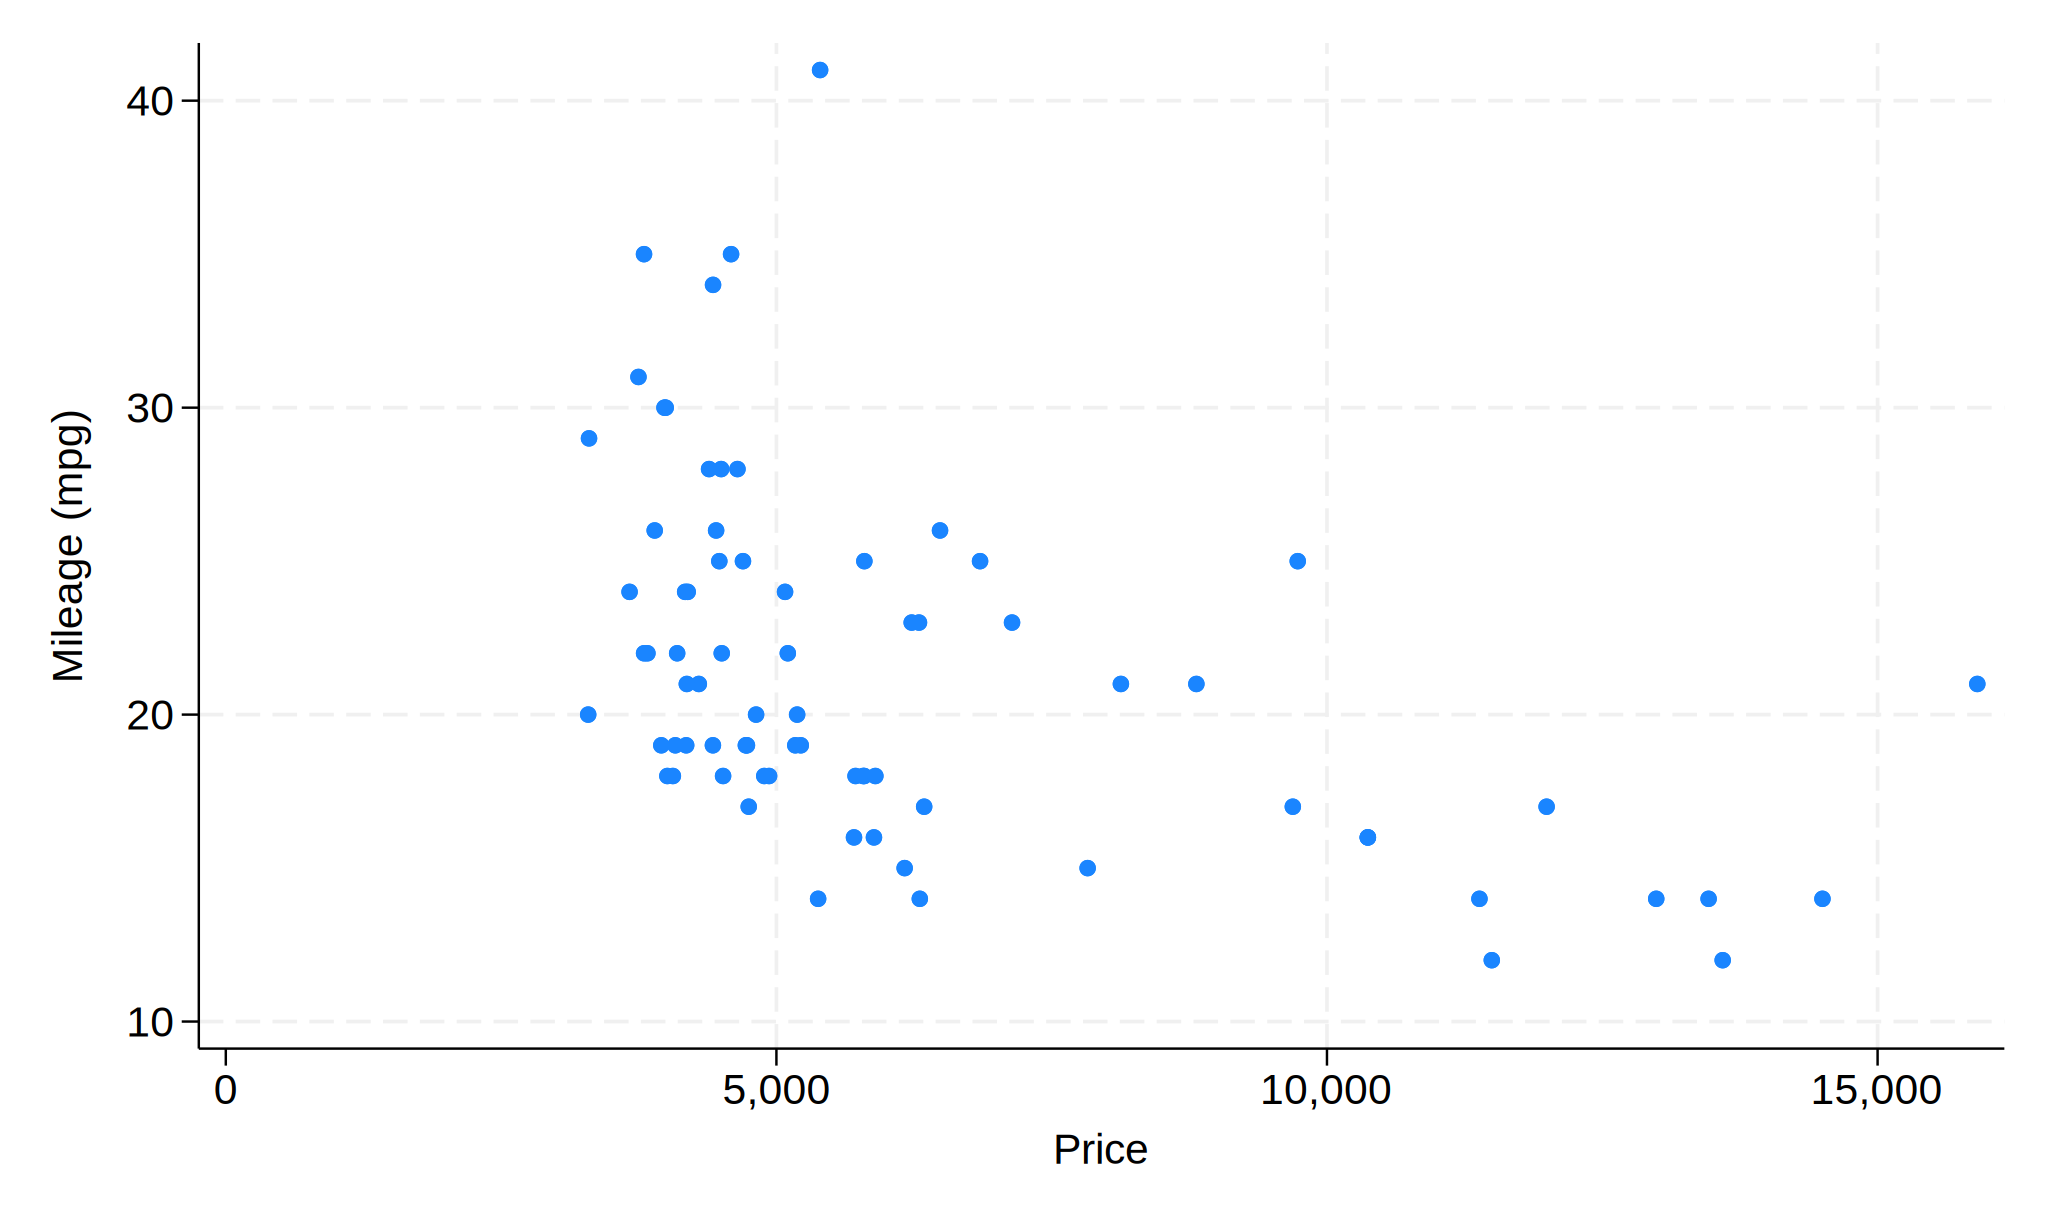

In [6]:
# %%stata
# twoway scatter mpg price

In [7]:
# import pandas as pd
# df = pd.read_csv('wage1.csv')
# df.columns

Index(['wage', 'educ', 'exper', 'tenure', 'nonwhite', 'female', 'married',
       'numdep', 'smsa', 'northcen', 'south', 'west', 'construc', 'ndurman',
       'trcommpu', 'trade', 'services', 'profserv', 'profocc', 'clerocc',
       'servocc', 'lwage', 'expersq', 'tenursq'],
      dtype='object')

In [8]:
# %%stata -d df -force
# reg lwage educ exper expersq tenure tenursq, vce(r)


Linear regression                               Number of obs     =        526
                                                F(5, 520)         =      54.54
                                                Prob > F          =     0.0000
                                                R-squared         =     0.3669
                                                Root MSE          =     .42497

------------------------------------------------------------------------------
             |               Robust
       lwage | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
        educ |   .0845258   .0075047    11.26   0.000     .0697826    .0992691
       exper |    .029301   .0052419     5.59   0.000     .0190032    .0395988
     expersq |  -.0005918   .0001126    -5.26   0.000     -.000813   -.0003706
      tenure |   .0371222   .0077558     4.79   0.000     .0218857    .0523588
     tenursq |

In [9]:
# %%stata?

Docstring:
Execute one line or a block of Stata commands.

When the line magic command **%stata** is used, a one-line Stata 
command can be specified and executed, as it would be in Stata's 
Command window. When the cell magic command **%%stata** is used, a 
block of Stata commands can be specified and executed all at once. 
This is similar to executing a series of commands from a do-file.

Cell magic syntax:

    %%stata [-d DATA] [-f DFLIST|ARRLIST] [-force]
     [-doutd DATAFRAME] [-douta ARRAY] [-foutd FRAMELIST] [-fouta FRAMELIST]
     [-ret DICTIONARY] [-eret DICTIONARY] [-sret DICTIONARY] [-qui] [-nogr]
     [-gw WIDTH] [-gh HEIGHT]

    Optional arguments:

      -d DATA               Load a NumPy array or pandas dataframe 
                            into Stata as the current working dataset.

      -f DFLIST|ARRLIST     Load one or multiple NumPy arrays or 
                            pandas dataframes into Stata as frames. 
                            The arrays and datafram

In [10]:
# %stata reg lwage educ exper expersq tenure tenursq, vce(r)


Linear regression                               Number of obs     =        526
                                                F(5, 520)         =      54.54
                                                Prob > F          =     0.0000
                                                R-squared         =     0.3669
                                                Root MSE          =     .42497

------------------------------------------------------------------------------
             |               Robust
       lwage | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
        educ |   .0845258   .0075047    11.26   0.000     .0697826    .0992691
       exper |    .029301   .0052419     5.59   0.000     .0190032    .0395988
     expersq |  -.0005918   .0001126    -5.26   0.000     -.000813   -.0003706
      tenure |   .0371222   .0077558     4.79   0.000     .0218857    .0523588
     tenursq |